[9.1584]


"\ndateien = np.arange(500,8000,500)\nRu85 = []\nRu185 = []\nRu87 =[]\nRu187=[]\nfor datei in dateien:\n    lande = LandeFaktor('230508_OptischesPumpen/Resonanz'+str(datei)+'kHz')\n    b_peaks = lande.get_b(lande.findpeaksauto())\n    Ru85.append(b_peaks[1])\n    Ru185.append(b_peaks[-2])\n    Ru87.append(b_peaks[2])\n    Ru187.append(b_peaks[-3])\nplt.plot(dateien*1000,Ru85,label='Ru85')\nplt.plot(dateien*1000,Ru87,label='Ru87')\nplt.plot(dateien*1000,Ru185,label='Ru85_1')\nplt.plot(dateien*1000,Ru187,label='Ru87_1')\nplt.xlabel('Frequenz in Hz')\nplt.ylabel('Magnetfel in T')\n\nfit,err = np.polyfit(dateien*1000,Ru187,deg=1,cov = True)\n\na = fit[0]\nb=fit[1]\n#print(a)\nh = 6.626e-34\nmub = 9.274e-24\n#print(h/(mub*a))\nyseq = a*dateien*1000+b\nplt.plot(dateien*1000,yseq)\nplt.legend()\n"

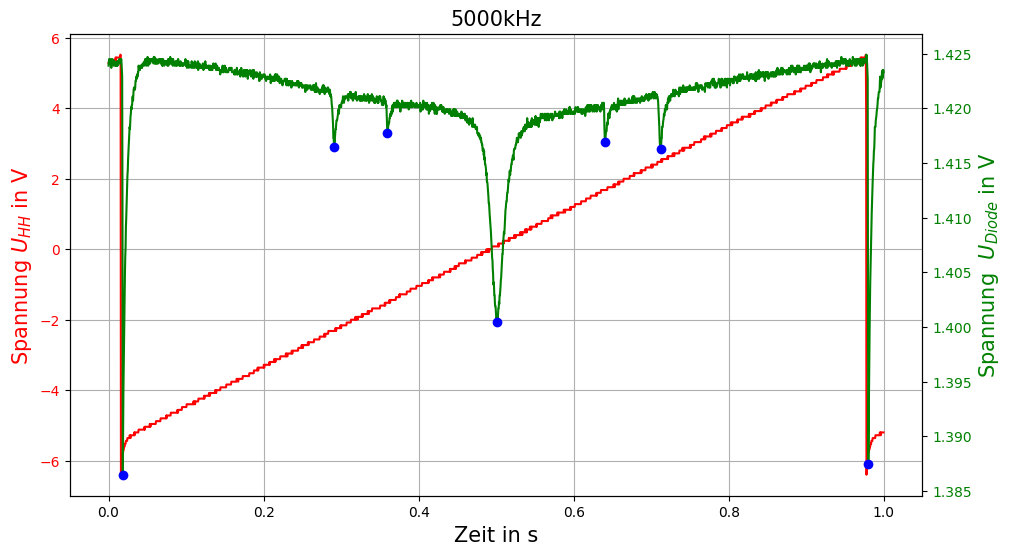

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import peak_widths
from matplotlib.gridspec import GridSpec
import csv
import os

class LandeFaktor:
    def __init__(self,path):
        self.path = path
        self.file = open(self.path)
        self.file = csv.reader(self.file,delimiter='\t')
        self.time = []
        self.channel1 = []
        self.channel2 =[]
        for line in self.file:
            self.time.append(float(line[0]))
            self.channel1.append(float(line[1]))
            self.channel2.append(float(line[2]))
        self.time = np.array(self.time)
        self.time_phase = self.time 
        self.channel1 = np.array(self.channel1) 
        self.channel2= np.array(self.channel2)

    def findpeaksauto(self):
        peaks = find_peaks(-self.channel2,prominence=0.002,distance=5)
        return peaks[0]
    
    def give_current(self,peaks):
        widerstand = 1.745
        return self.channel1[peaks] / widerstand

    def get_b(self,peaks):
        current = self.give_current(peaks)
        mu0 = 1.256637061e-6
        N = 80
        r = 0.09
        B = mu0*(4/5)**(3/2) * N/r * current
        return B

    def sweep(self):
        frequenz = 9.875*(self.time[self.findpeaksauto()]-0.012) + 0.5
        print(frequenz)
        return frequenz



    def plotwithpeaks(self,peaks=[],findpeaks = False):
        if findpeaks:
            peaks = self.findpeaksauto()
        fig = plt.figure(figsize=(11,6))
        gs = GridSpec(8,5)
        fig1 = fig.add_subplot(gs[:,:])
        fig1.set_title(str(self.path)[31:], fontsize = 15)

        fig1.set_xlabel('Zeit in s',fontsize = 15)
        fig1.set_ylabel(r'Spannung $U_{HH}$ in V',color = 'r', fontsize = 15)
        fig1.tick_params(axis='y',labelcolor='r')
        fig1.plot(self.time_phase, self.channel1,'r-', label = 'Channel 1')
        fig1.grid(True)

        fig2 = fig1.twinx()
        fig2.set_ylabel(r'Spannung  $U_{Diode}$ in V',color='g',fontsize=15)
        fig2.tick_params(axis='y',labelcolor = 'g')
        fig2.plot(self.time,self.channel2,'g',label='Channel 2')
        for peak in peaks:
            plt.plot(self.time[peak],self.channel2[peak],'bo')

lande2500 = LandeFaktor('230508_OptischesPumpen/Resonanz5000kHz')
lande = LandeFaktor('230508_OptischesPumpen/Sweep2_38A')
#print(lande2500.getpeakwidth())
peaks = [988,1076,1423,1512]
lande2500.plotwithpeaks(findpeaks=True)
lande.sweep()
plt.savefig('resonanz_peaks.pdf')
'''
direc = os.listdir('230508_OptischesPumpen/')
direc = sorted(direc)
print(sorted(direc))
currents = np.array([-0.24,-0.49,-0.73,-0.98,-1.23,-1.47,-1.96,-2.43,0.24,0.48,0.72,0.95,1.9,1.43,2.38])
currents87 = np.array([-0.24,-0.49,-0.73,-0.98,-1.23,-1.47,0.24,0.48,0.72,0.95,1.43])
mu0 = 1.256637061e-6
N = 80
r = 0.09
h = 6.626e-34
mub = 9.274e-24
B85 = mu0*(4/5)**(3/2) * N/r * currents
B87 = mu0*(4/5)**(3/2) * N/r * currents87
sweepru85 = np.array([0.9585,1.86275,2.7831,3.69555,4.608,5.52835,7.32165,9.05175,0.9266,1.8193,2.7085,3.7943,7.3098,5.38615,9.1584])
sweepru87 = np.array([1.42825,2.7831,4.16955,5.53625,6.92665,8.3052,1.38085,2.71595,4.055,5.57575,8.04055])
fig = plt.figure(figsize=(11,6))
gs = GridSpec(8,5)
fig1 = fig.add_subplot(gs[:,:])
fig1.set_xlabel('Frequenz in MHz',fontsize = 15)
fig1.set_ylabel('Magnetfeld in T', fontsize = 15)
fig1.tick_params(axis='y')
fit , err = np.polyfit(sweepru85[:len(sweepru85)//2],B85[:len(B85)//2],deg =1,cov = True)
fit1, err = np.polyfit(sweepru85[len(sweepru85)//2+1:],B85[len(B85)//2+1:],deg =1,cov = True)
fit2, err = np.polyfit(sweepru87[:len(sweepru87)//2],B87[:len(B87)//2],deg =1,cov = True)
fit3, err = np.polyfit(sweepru87[len(sweepru87)//2+1:],B87[len(B87)//2+1:],deg =1,cov = True)
yseq = fit[0]*sweepru85[:len(sweepru85)//2]+fit[1]
yseq1 = fit1[0]*sweepru85[len(sweepru85)//2+1:]+fit1[1]
yseq2 = fit2[0]*sweepru87[:len(sweepru87)//2]+fit2[1]
yseq3 = fit3[0]*sweepru87[len(sweepru87)//2+1:]+fit3[1]
fig1.plot(sweepru85[:len(sweepru85)//2],yseq,'g-',label=r'$^{85}Ru$ Fit')
fig1.plot(sweepru85[len(sweepru85)//2+1:],yseq1,'g-')
fig1.plot(sweepru87[:len(sweepru87)//2],yseq2,'b-')
fig1.plot(sweepru87[len(sweepru87)//2+1:],yseq3,'b-',label=r'$^{87}Ru$ Fit')
fig1.plot(sweepru85[len(B85)//2+1:],B85[len(B85)//2+1:],'go',label=r'$^{85}Ru$ Data')
fig1.plot(sweepru85[:len(B85)//2],B85[:len(B85)//2],'go')
fig1.plot(sweepru87[len(B87)//2+1:],B87[len(B87)//2+1:],'bd',label=r'$^{87}Ru$ Data')
fig1.plot(sweepru87[:len(B87)//2],B87[:len(B87)//2],'bd')
fig1.grid(True)
plt.legend()
#plt.savefig('lande_from_sweep.pdf')
#for file in direc:
 #   if file.startswith('Sweep'):
 #       try:
 #           lande = LandeFaktor('230508_OptischesPumpen/'+str(file))
 #           sweepru85.append(lande.sweep()[0])
 #       except:
 #           pass

#plt.plot(currents,sweepru85,'+')

#lande2500.plotwithpeaks(peaks,findpeaks=True)
#print(lande2500.get_b(lande2500.findpeaksauto()))
'''


'''
dateien = np.arange(500,8000,500)
Ru85 = []
Ru185 = []
Ru87 =[]
Ru187=[]
for datei in dateien:
    lande = LandeFaktor('230508_OptischesPumpen/Resonanz'+str(datei)+'kHz')
    b_peaks = lande.get_b(lande.findpeaksauto())
    Ru85.append(b_peaks[1])
    Ru185.append(b_peaks[-2])
    Ru87.append(b_peaks[2])
    Ru187.append(b_peaks[-3])
plt.plot(dateien*1000,Ru85,label='Ru85')
plt.plot(dateien*1000,Ru87,label='Ru87')
plt.plot(dateien*1000,Ru185,label='Ru85_1')
plt.plot(dateien*1000,Ru187,label='Ru87_1')
plt.xlabel('Frequenz in Hz')
plt.ylabel('Magnetfel in T')

fit,err = np.polyfit(dateien*1000,Ru187,deg=1,cov = True)

a = fit[0]
b=fit[1]
#print(a)
h = 6.626e-34
mub = 9.274e-24
#print(h/(mub*a))
yseq = a*dateien*1000+b
plt.plot(dateien*1000,yseq)
plt.legend()
'''
#plt.xlim(0.475,0.525)


In [10]:
np.array([1,2,3,4])+0.01

array([1.01, 2.01, 3.01, 4.01])